## Тема “Обучение без учителя”
### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [101]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = ds.feature_names)
y = pd.DataFrame(boston.target)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [104]:
model_tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = model_tsne.fit_transform(X_train_scaled)

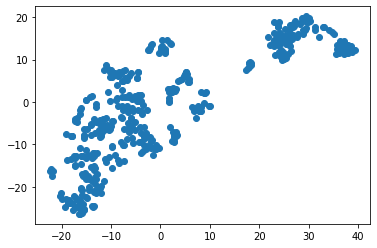

In [105]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [106]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
X_train_kmeans = model_kmeans.fit_predict(X_train_scaled)

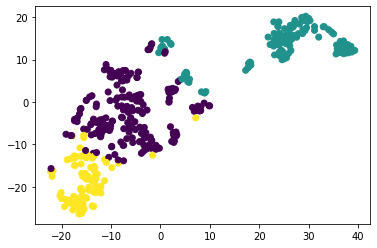

In [107]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = X_train_kmeans)
plt.show()

In [108]:
df = pd.DataFrame(columns = ["CRIM", "price"])
for i in np.unique(X_train_kmeans):
    df.loc[i] = [X_train.loc[X_train_kmeans == i, "CRIM"].mean(), y_train[X_train_kmeans == i].mean()[0]]
df

,CRIM,price
0,0.421660,24.958115
1,10.797028,16.165354
2,0.073566,27.788372


###### Из данных следует, что чем выше уровень преступности в кластере, тем ниже стоимость жилья.

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [109]:
X_test_kmeans = model_kmeans.predict(X_test_scaled)

In [110]:
df = pd.DataFrame(columns = ["CRIM", "price"])
for i in np.unique(X_test_kmeans):
    df.loc[i] = [X_test.loc[X_test_kmeans == i, "CRIM"].mean(), y_test[X_test_kmeans == i].mean()[0]]
df

,CRIM,price
0,0.266079,21.860784
1,10.165531,16.437143
2,0.062060,31.350000


##### Из данных следует, что описанная выше зависимость сохраняется.